In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [374]:
df1=pd.read_csv("Suicide data set.csv")


In [375]:
df1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [376]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [377]:
df1.shape

(27820, 12)

In [378]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [379]:
df1.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [380]:
for i in df1.columns:
    print(i , df1[i].nunique())

country 101
year 32
sex 2
age 6
suicides_no 2084
population 25564
suicides/100k pop 5298
country-year 2321
HDI for year 305
 gdp_for_year ($)  2321
gdp_per_capita ($) 2233
generation 6


In [381]:
df1.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [382]:
df1.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [190]:
#df1.country = df1.country.astype('category')
#df1.sex = df1.sex.astype('category')
#df1.age = df1.age.astype('category')
#df1.generation = df1.generation.astype('category')
#df1['country-year'] =df1['country-year'].astype('category')
#df1[' gdp_for_year ($) '] = df1[' gdp_for_year ($) '].astype('category')
#mpg_df['hp']=#mpg_df['hp'].astype('float64')

### 1. How many categorical variables does the data contain? Please state the number of categories for each such variable.

- There are 6 Categorical Variable
Number of categories for each such variable are the following:
- country : 101
- year : 32
- sex : 2
- age : 6
- country-year : 2321
- generation : 6

### 2.How strong is the correlation between HDI and suicides_no?

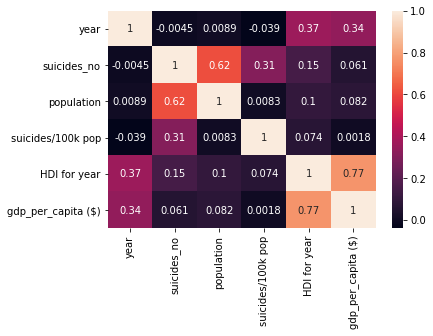

In [197]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

- the Correlation coefficient between the HDI and Suicides_no is 0.15, therefore they have a weak correlation  

### 3.Which generation has the highest number of suicides/100k pop?

In [399]:
df1.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [206]:
df=df1[['generation','suicides/100k pop']].groupby('generation').agg('mean')
df[df['suicides/100k pop']==df['suicides/100k pop'].max()]

,suicides/100k pop
generation,
G.I. Generation,23.946378


In [ ]:
# G.I. Generation has the highest number of  suicides/100k pop   

### 4.Which country has the least number of suicides between 1990-1995?


In [384]:
df=df1[df1['year']>=1990][df1['year']<=1995]#[df1['suicides_no']>0]

In [385]:
df=df[['country','suicides_no']].groupby('country').agg('mean')
df[df['suicides_no']==df['suicides_no'].min()]

,suicides_no
country,
Qatar,0.0
Saint Kitts and Nevis,0.0


In [386]:
df=df1[df1['year']>=1990][df1['year']<=1995][df1['suicides_no']>0]
df=df[['country','suicides_no']].groupby('country').agg('mean')
df[df['suicides_no']==df['suicides_no'].min()]

,suicides_no
country,
Antigua and Barbuda,1.0


In [296]:
####  Qatar and Saint Kitts and Nevis  have 0 records of suicide ,Antigua and Barbuda has the least number of suicides between 1990-1995 , i.e 1 

### 5.Are there any countries with no suicides recorded?  Create a new data frame which ranks these countries by HDI.


In [397]:

df=df1[['country','suicides_no','HDI for year']].groupby(['country']).agg('min')
df=df[df['suicides_no']==0]
df=df['HDI for year'].sort_values(ascending=False)
df

country
Australia                0.865
Norway                   0.849
Switzerland              0.846
Denmark                  0.830
United Arab Emirates     0.822
Sweden                   0.815
New Zealand              0.805
Cyprus                   0.800
Netherlands              0.799
Oman                     0.793
Finland                  0.783
Qatar                    0.783
Slovenia                 0.782
Antigua and Barbuda      0.781
Iceland                  0.776
Belgium                  0.774
Bahamas                  0.774
Israel                   0.768
Austria                  0.764
Czech Republic           0.761
United Kingdom           0.753
Luxembourg               0.752
Slovakia                 0.750
Montenegro               0.750
Ireland                  0.742
Greece                   0.741
Hungary                  0.740
Italy                    0.738
Grenada                  0.737
Seychelles               0.736
                         ...  
Turkmenistan             0.666


In [ ]:
# There are 82 countries with no suicide records

In [388]:
#  the countries with no  suicides recorded for any year
df=df1[['country','suicides_no','HDI for year']].groupby('country').agg('mean')
df[df['suicides_no']==0]

,suicides_no,HDI for year
country,,
Dominica,0.0,NaN
Saint Kitts and Nevis,0.0,NaN


### 6.Generate suitable graphs for comparing suicides between men and women for the top 5 countries with the highest suicide rate per 100,000.


In [395]:
df=df1[['country','suicides/100k pop']].groupby('country').agg('mean')
#Top % countries
a=df[df['suicides/100k pop']>31]
a

,suicides/100k pop
country,
Belarus,31.075913
Hungary,32.761516
Lithuania,40.415573
Russian Federation,34.892377
Sri Lanka,35.295152


### 7.Are there any redundant columns in the dataset? Which coulmn is it? Can that column be dropped? State your reasons.

#### yes, there is a redundant column in the dataset, i.e 'country-year', it can be dropped because we alreday have country and year columns in the dataset


### 8.Please obtain the distribution of suicides for each age group for Argentina. Plot these as graphs


In [128]:
df=df1[df1['country']=='Argentina']

In [130]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers


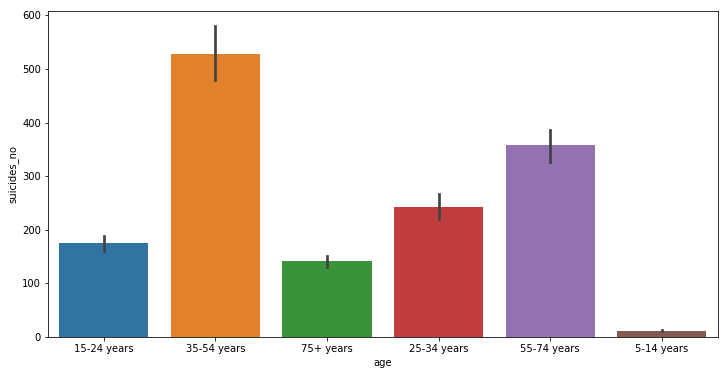

In [133]:
plt.figure(figsize=(12,6))
sns.barplot(y='suicides_no',x='age',data=df1)
plt.show()

# 9.Generate a correlation heatmap for the dataset. Which pairs of variables are highly correlated.


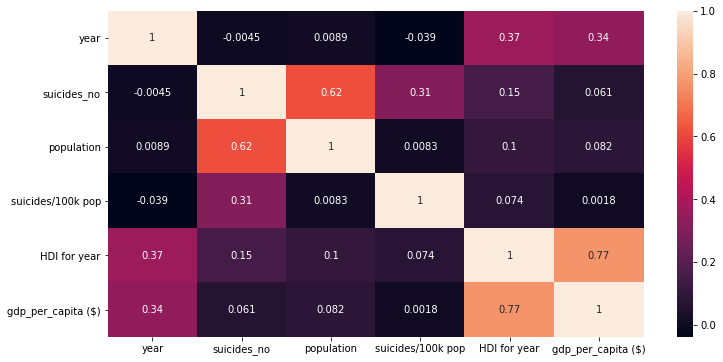

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),annot=True)
plt.show()

- HDI for Year is highly correlated with gdp_per_capita 
- Population is highly correlated with gdp_per_capita


# 10. Generate the following tables:
    a) A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. Total Suicides has to be calculated from the existing table.(3 marks)
    b) A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.(2 marks)
    c) Merge the above two tables using ‘Country’ as the merge column.(2 marks)


a) A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. Total Suicides has to be calculated from the existing table.(3 marks)

In [70]:
df1.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [356]:
ndf=df1[['country', 'year']]

In [357]:
ndf.head()

,country,year
0,Albania,1987
1,Albania,1987
2,Albania,1987
3,Albania,1987
4,Albania,1987


In [359]:
ndf.drop_duplicates(inplace=True)

In [360]:
mdf=df1[['country','year','suicides_no' ]].groupby(['country','year']).agg('sum')



In [361]:
total=mdf.suicides_no.values

In [365]:
ndf['Total_suicides']=total

In [366]:
ndf.index=range(0,2321)

In [367]:
ndf

,country,year,Total_suicides
0,Albania,1987,73
1,Albania,1988,63
2,Albania,1989,68
3,Albania,1992,47
4,Albania,1993,73
5,Albania,1994,50
6,Albania,1995,88
7,Albania,1996,89
8,Albania,1997,170
9,Albania,1998,154


b) A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.(2 marks)

In [332]:
df3=df1[['country', 'year', 'gdp_per_capita ($)']]

In [333]:
df3

,country,year,gdp_per_capita ($)
0,Albania,1987,796
1,Albania,1987,796
2,Albania,1987,796
3,Albania,1987,796
4,Albania,1987,796
5,Albania,1987,796
6,Albania,1987,796
7,Albania,1987,796
8,Albania,1987,796
9,Albania,1987,796


In [334]:
df3.drop_duplicates(inplace=True)

In [335]:
df3

,country,year,gdp_per_capita ($)
0,Albania,1987,796
12,Albania,1988,769
24,Albania,1989,833
36,Albania,1992,251
48,Albania,1993,437
60,Albania,1994,697
72,Albania,1995,835
84,Albania,1996,1127
96,Albania,1997,793
108,Albania,1998,899


In [336]:
df3.index=range(0,2321)

c) Merge the above two tables using ‘Country’ as the merge column.(2 marks)

In [371]:
df3['Total Suicides']= ndf['Total_suicides'].where(ndf['country']==df3['country'])

In [372]:
df3

,country,year,gdp_per_capita ($),Total Suicides
0,Albania,1987,796,73
1,Albania,1988,769,63
2,Albania,1989,833,68
3,Albania,1992,251,47
4,Albania,1993,437,73
5,Albania,1994,697,50
6,Albania,1995,835,88
7,Albania,1996,1127,89
8,Albania,1997,793,170
9,Albania,1998,899,154
